In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Logistic / Sigmoid function

$$ y = \frac{1}{1+e^{-z}} $$

In [2]:
def sigmoid(z):
    y = 1/(1 + np.exp(-1*z))
    return y

In [3]:
sigmoid(0).item()

0.5

In [4]:
sigmoid(10).item()

0.9999546021312976

In [5]:
sigmoid(-5).item()

0.0066928509242848554

### Plot of sigmoid functon

In [6]:
z = np.linspace(-5,5,100)
y = sigmoid(z)

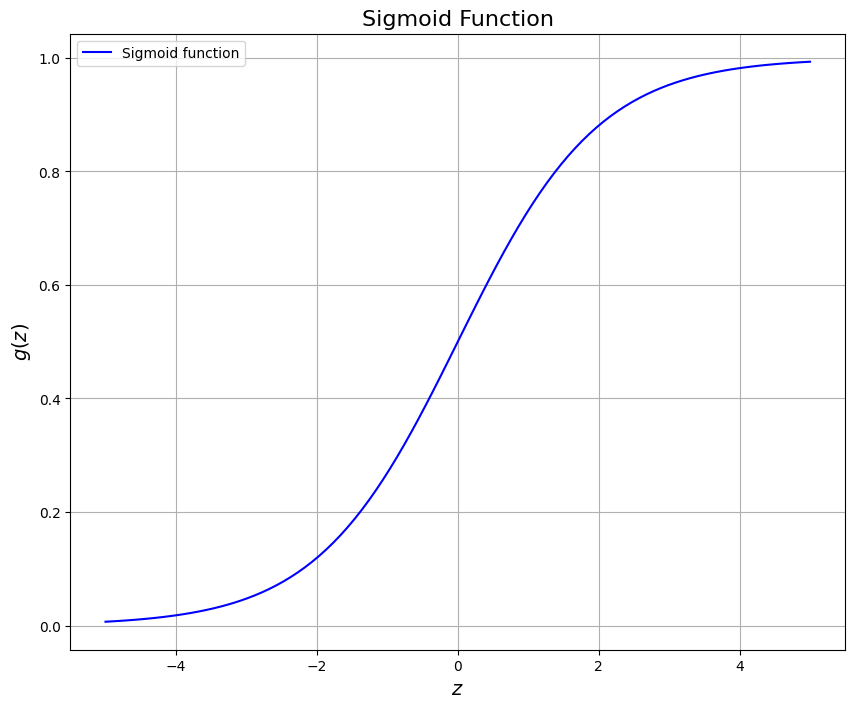

In [7]:
plt.figure(figsize=(10,8))
plt.plot(z, y, 'b-', label="Sigmoid function")
plt.grid()
plt.title("Sigmoid Function", fontsize=16)
plt.xlabel("$z$", fontsize=14)
plt.ylabel("$g(z)$", fontsize=14)
plt.legend()
plt.show()

## Derivative of logistic / sigmoid function

if $g(z) = \frac{1}{1+e^{-z}} $

then $ g'(z) = \frac{dg(z)}{dz} = g(z)(1- g(z)) $

In [8]:
def derivative_of_sigmoid(z):
    g = sigmoid(z)
    return g*(1-g)

In [9]:
d = derivative_of_sigmoid(z)

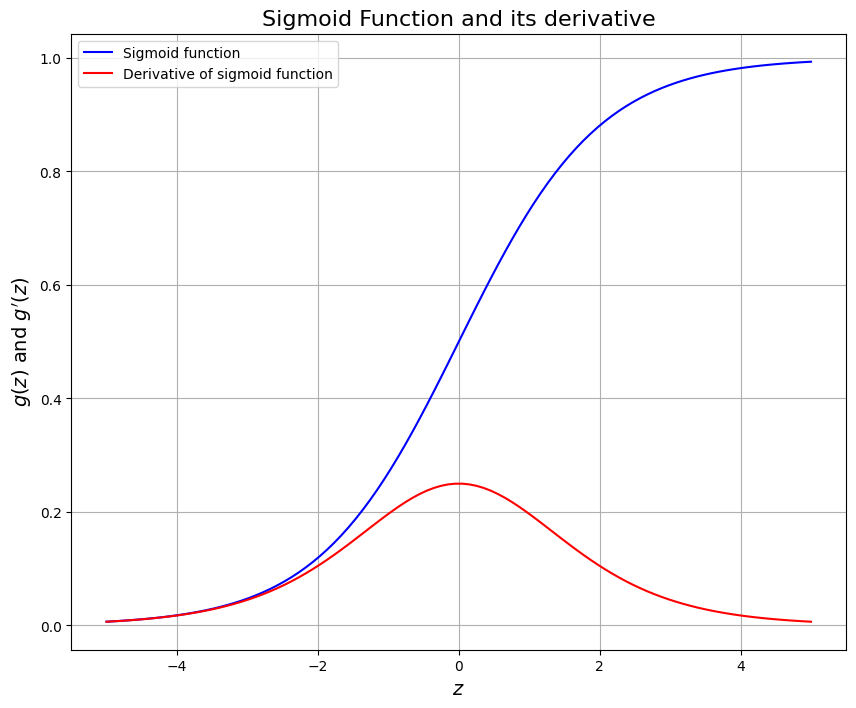

In [10]:
plt.figure(figsize=(10,8))
plt.plot(z, y, 'b-', label="Sigmoid function")
plt.plot(z, d, 'r-', label="Derivative of sigmoid function")
plt.grid()
plt.title("Sigmoid Function and its derivative", fontsize=16)
plt.xlabel("$z$", fontsize=14)
plt.ylabel("$g(z)$ and $g'(z)$", fontsize=14)
plt.legend()
plt.show()

## Cost function

First we shall create a classification dataset and based on that we shall observe the performance of cost functions

In [11]:
from sklearn.datasets import make_classification
import pandas as pd

In [12]:
X, y = make_classification(n_samples=500,          # number of data points in the dataset
                           n_features=2,            # number of features / independent variables
                           n_classes=2,             # number of classes in the dataset
                           n_clusters_per_class=1,  # number of cluster in each class
                           n_informative=2,         # number of informative features
                           n_redundant=0,           # number of redundant features
                           n_repeated=0,            # number of repeated features
                           class_sep=3,             # Larger values spread out the clusters/classes.
                           shuffle=True)            # whether to shuffle the dataset

In [13]:
dataset = pd.DataFrame(np.hstack((X, y.reshape(-1,1))), columns=['x1', 'x2', 'target'])

In [14]:
dataset.head(10)

,x1,x2,target
0,2.128936,3.014431,0.0
1,-2.778192,3.642222,1.0
2,3.752687,2.396102,0.0
3,-2.773043,2.859364,1.0
4,4.362597,2.070071,0.0
5,2.836268,2.532190,0.0
6,2.638065,3.099971,0.0
7,2.359584,2.415318,0.0
8,-3.163760,2.533103,1.0
9,-2.886774,2.393798,1.0


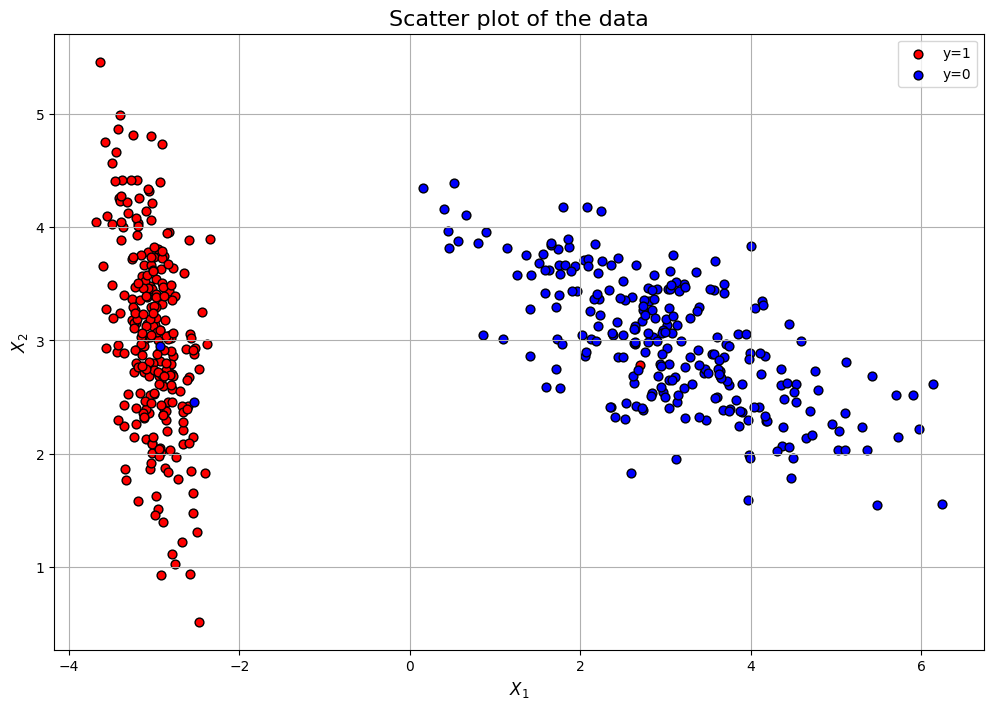

In [15]:
plt.figure(figsize=(12,8))
data_1 = dataset[dataset['target']==1]
data_0 = dataset[dataset['target']==0]
plt.scatter(x=data_1['x1'].values, y=data_1['x2'].values, s=40, c='r', edgecolor='k', label="y=1")
plt.scatter(x=data_0['x1'].values, y=data_0['x2'].values, s=40, c='b', edgecolor='k', label="y=0")
plt.title("Scatter plot of the data",fontsize=16)
plt.xlabel("$X_1$", fontsize=12)
plt.ylabel("$X_2$", fontsize=12)
plt.grid()
plt.legend()
plt.show()

### Why not to use mean squared error cost function in classification?

In [16]:
def mse_cost(y_pred, y_actual):
    return 0.5*np.mean(np.square(np.array(y_pred) - np.array(y_actual)))

The hypostheis function will look like:

$$ y_p = h_{\theta}(x) = g\left(\theta_0 + \sum_{j=1}^{k}\theta_k x_k \right) = g(\theta_0 + \theta_1 x_1 + \theta_2 x_2) $$

Where $g(z) = \frac{1}{1+e^{-z}}$

*Suppose*

$\theta_1 = \theta_2 = 1$

and $\theta_0$ is variable between -10 to +10

In [17]:
X = np.hstack((np.ones((len(X), 1)), X))

In [18]:
X

array([[ 1.        ,  2.12893625,  3.01443142],
       [ 1.        , -2.77819157,  3.64222166],
       [ 1.        ,  3.7526874 ,  2.39610164],
       ...,
       [ 1.        ,  1.88601833,  3.60954975],
       [ 1.        ,  0.52299396,  4.38583307],
       [ 1.        , -2.99150529,  1.45895621]], shape=(500, 3))

In [19]:
theta_0_values = np.linspace(-10, 10, 100)

In [20]:
theta_1 = 1
theta_2 = 1

In [21]:
# one example 

theta = np.array([-2,1,1]).reshape(-1,1)

theta

array([[-2],
       [ 1],
       [ 1]])

In [22]:
mse_costs = []

for i in range(len(theta_0_values)):
    theta_0 = theta_0_values[i]
    theta = np.array([theta_0, theta_1, theta_2]).reshape(-1,1)
    z_p = X @ theta
    y_p = sigmoid(z_p)
    cost = mse_cost(y_p, y)
    mse_costs.append(cost)

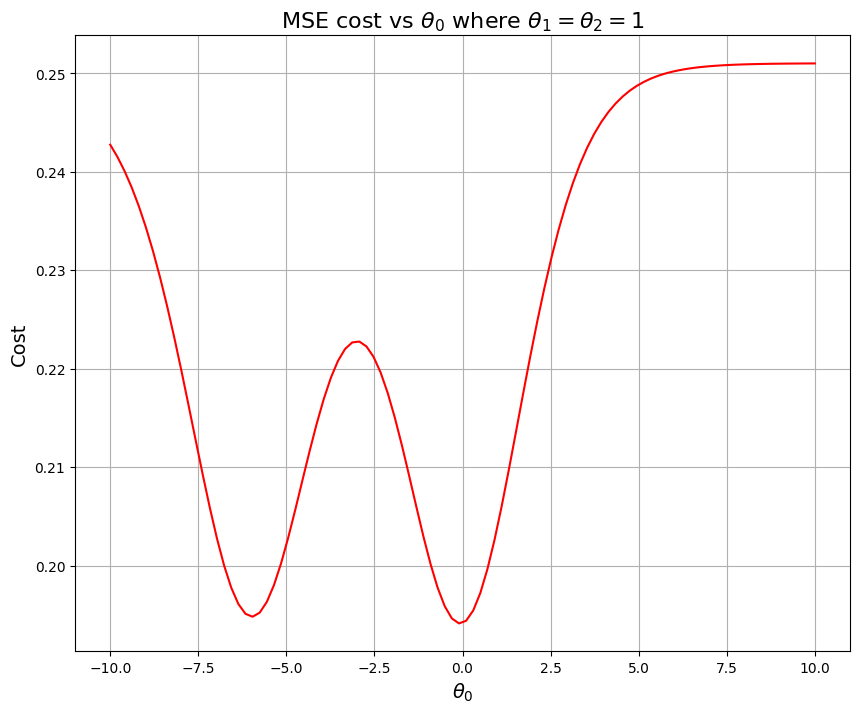

In [23]:
plt.figure(figsize=(10,8))
plt.plot(theta_0_values, mse_costs, 'r-')
plt.title("MSE cost vs $\\theta_0$ where $\\theta_1 = \\theta_2 = 1$", fontsize=16)
plt.xlabel("$\\theta_0$", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.grid()
plt.show()

As the MSE cost produces non-convex shape of cost function, hence we won't be using MSE cost function

### What if we use log-loss or binary cross entropy loss?

$$ J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left( y^{(i)}log(y^{(i)}_p) + (1-y^{(i)})log(1-y^{(i)}_p)\right)$$

In [24]:
def bce_loss(y_pred, y_actual):
    return (-1)*np.mean(y_actual * np.log(y_pred) + (1-y_actual)*np.log(1-y_pred))

In [25]:
bce_costs = []

for i in range(len(theta_0_values)):
    theta_0 = theta_0_values[i]
    theta = np.array([theta_0, theta_1, theta_2]).reshape(-1,1)
    z_p = X @ theta
    y_p = sigmoid(z_p)
    cost = bce_loss(y_p, y)
    bce_costs.append(cost)

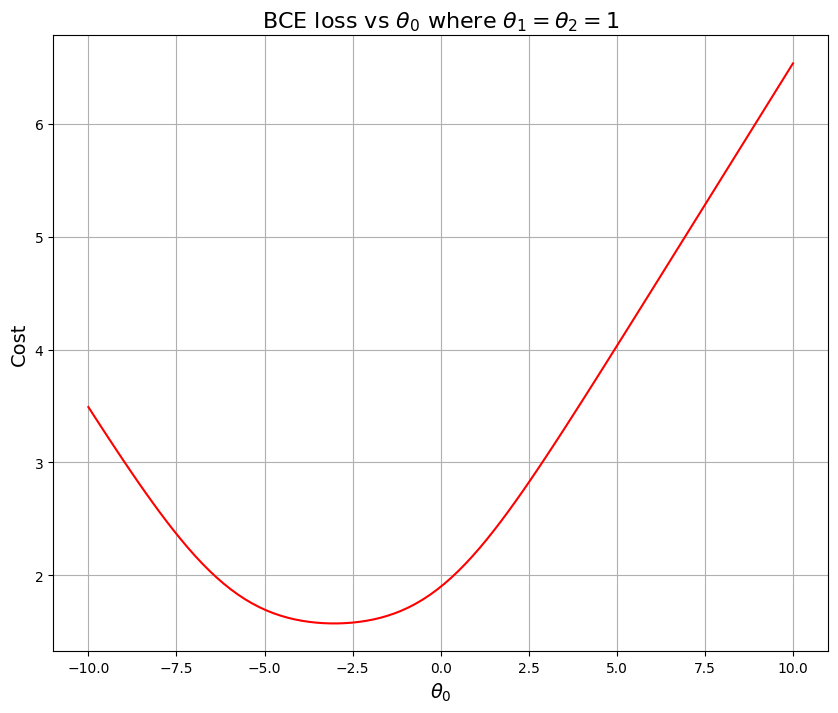

In [26]:
plt.figure(figsize=(10,8))
plt.plot(theta_0_values, bce_costs, 'r-')
plt.title("BCE loss vs $\\theta_0$ where $\\theta_1 = \\theta_2 = 1$", fontsize=16)
plt.xlabel("$\\theta_0$", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.grid()
plt.show()

**Observation**

Using BCE loss we can obtain a convex function of the loss and that can be minimized using gradient descent optimization.

### Implementation of logistic regression in python from scratch

**Hypostheis function:**

$$ y_p = h_{\theta}(x) = g\left(\theta_0 + \sum_{j=1}^{k}\theta_k x_k \right) $$

Where $g(z) = \frac{1}{1+e^{-z}}$

**Cost function (Binary Cross Entropy loss):**

$$ J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left( y^{(i)}log(y^{(i)}_p) + (1-y^{(i)})log(1-y^{(i)}_p)\right)$$

where $m$ = total number of training samples.

**Gradient descent update rule:**

$$ \theta_j(t+1) \leftarrow \theta_j(t) - \alpha \frac{\partial J}{\partial \theta_j}$$

**Now, the partial dervatives are computed as:**

$$ \frac{\partial J}{\partial \theta_0} = \frac{1}{m}\sum_{i=1}^{m} \left(y^{(i)}_p - y^{(i)} \right)\ ;\ \ for\ the\ bias $$
$$ \frac{\partial J}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^{m} \left(y^{(i)}_p - y^{(i)} \right)x^{(i)}_j\ ;\ \ for\ the\ other\ weights/parameters $$

In [27]:
def bce_loss(y_pred, y_actual):
    return (-1)*np.mean(y_actual * np.log(y_pred) + (1-y_actual)*np.log(1-y_pred))

class OurLogisticRegression:

    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.bias = None          # theta_0
        self.weights = None       # theta_1, theta_2, theta_3, ... , theta_k
        self.loss = []

    def _sigmoid(self, x):
        return 1/(1+np.exp(-x))
    
    def predict_probability(self, X):
        linear_model = np.dot(X, self.weights) + self.bias     # z = theta_0 + theta_1 * x1 + theta_2 * x2 + .... + theta_k *  xk
        predicted_probability = self._sigmoid(linear_model)
        return predicted_probability
    
    def fit(self, X, y):
        n_samples, n_features = X.shape

        # initialize parameters
        self.weights = np.random.rand(n_features)
        self.bias = np.random.rand(1)[0]

        # gradient descent
        for i in range(self.n_iters):

            # predict the probabilty
            y_p = self.predict_probability(X)

            # compute and update the loss
            self.loss.append(bce_loss(y_p, y))

            # compute gradient
            db = (1 / n_samples) * np.sum(y_p - y)         # bias
            dw = (1 / n_samples) * np.dot(X.T, (y_p - y))  # other parameters

            # update parameters
            self.bias -= self.lr * db        # self.bias = self.bias - self.lr * db
            self.weights -= self.lr * dw     # self.weights = self.weights - self.lr * dw

    def predict_class(self, X, threshold = 0.5):
        y_p = self.predict_probability(X)
        y_class = (y_p > threshold).astype('int')   # if probabilty > threshold then 1 else 0
        return y_class
    
    

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [29]:
bc_data = load_breast_cancer()

bc_data['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [31]:
bc_data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]], shape=(569, 30)),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,

In [32]:
print(bc_data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [30]:
import pandas as pd

pd.DataFrame(bc_data['data'], columns=bc_data['feature_names'])

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [38]:
X = bc_data['data'][:,:4]   # first four features
y = bc_data['target']

X.shape, y.shape

((569, 4), (569,))

In [39]:
pd.DataFrame(X, columns=bc_data['feature_names'][:4])

,mean radius,mean texture,mean perimeter,mean area
0,17.99,10.38,122.80,1001.0
1,20.57,17.77,132.90,1326.0
2,19.69,21.25,130.00,1203.0
3,11.42,20.38,77.58,386.1
4,20.29,14.34,135.10,1297.0
...,...,...,...,...
564,21.56,22.39,142.00,1479.0
565,20.13,28.25,131.20,1261.0
566,16.60,28.08,108.30,858.1
567,20.60,29.33,140.10,1265.0


In [40]:
# splitting into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [41]:
X_train.shape, X_test.shape

((455, 4), (114, 4))

In [42]:
# scaling the features for better performance

sc = StandardScaler()
sc.fit(X_train)
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

X_train_scaled

array([[ 0.00907724,  0.83768327,  0.08131173, -0.14381147],
       [ 1.2121975 ,  0.56579573,  1.14894545,  1.19718251],
       [-0.5626182 , -1.19136178, -0.56307115, -0.57024237],
       ...,
       [-0.6081263 ,  0.74780309, -0.56431115, -0.61118435],
       [ 1.77820443,  0.53658467,  1.71107548,  1.82572839],
       [-0.69629823, -1.05654151, -0.66516389, -0.67403894]],
      shape=(455, 4))

In [45]:
# defining the model

logistic_reg = OurLogisticRegression(learning_rate=0.01, n_iters=1000)

# fitting with the training samples

logistic_reg.fit(X_train_scaled, y_train)

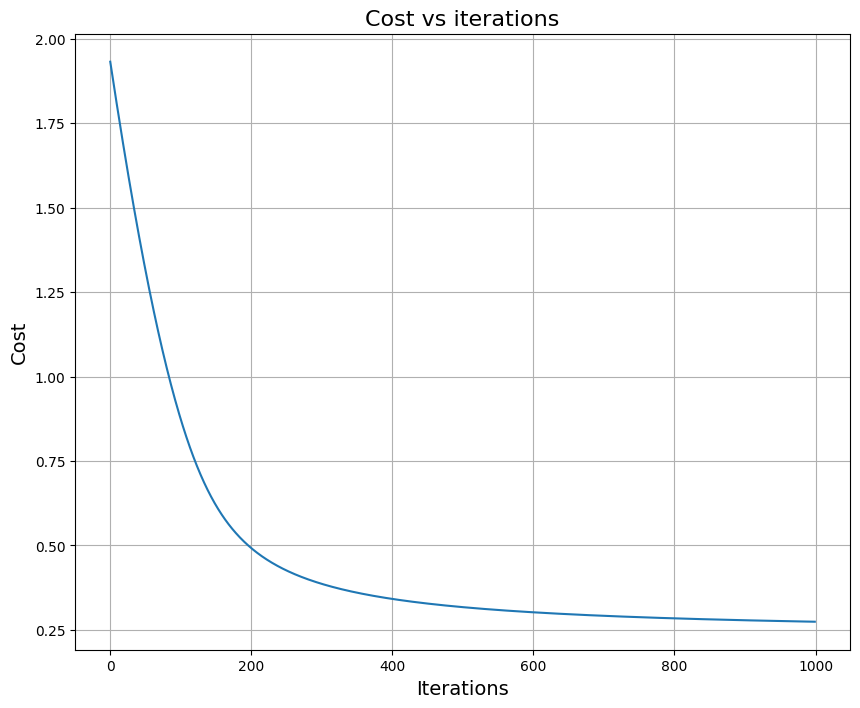

In [46]:
# plot the loss/cost vs iteration curve

plt.figure(figsize=(10,8))
plt.plot(logistic_reg.loss)
plt.title("Cost vs iterations", fontsize=16)
plt.xlabel("Iterations", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.grid()
plt.show()

In [47]:
# predict the classes of test data

y_test_pred = logistic_reg.predict_class(X_test_scaled)
y_test_pred

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0])

In [48]:
# performance evaluation on test data

accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)

print(f"accuracy = {accuracy:.2f}, precision = {precision:.2f}, recall = {recall:.2f}")

accuracy = 0.90, precision = 0.87, recall = 1.00


In [49]:
cm = confusion_matrix(y_test, y_test_pred)  # confusion matrix
cm

array([[30, 11],
       [ 0, 73]])

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay

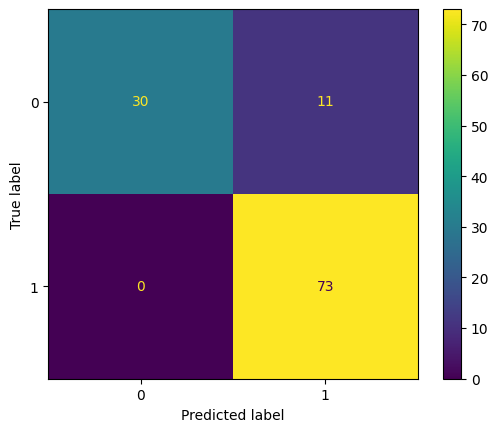

In [51]:
ConfusionMatrixDisplay(cm).plot()  # displaying the confusion matrix

### Logistic regresion in sklearn

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
# defining the model

model = LogisticRegression(penalty=None)   # by default the penalty is L2 (ridge). Penalty will be discussed in detail when we talk about regularization.

# fitting with the training sample

model.fit(X_train_scaled, y_train)

,penalty,None
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [54]:
# predict the classes of test data

y_pred_test = model.predict(X_test_scaled)
y_pred_test

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0])

In [55]:
# performance evaluation on test data

accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)

print(f"accuracy = {accuracy:.2f}, precision = {precision:.2f}, recall = {recall:.2f}")

accuracy = 0.90, precision = 0.87, recall = 1.00


In [56]:
cm = confusion_matrix(y_test, y_test_pred)   # confusion matrix
cm

array([[30, 11],
       [ 0, 73]])

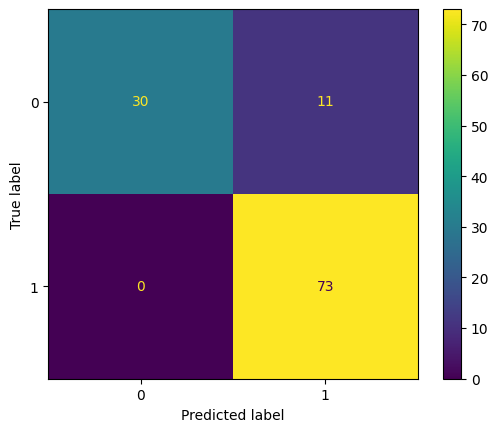

In [57]:
ConfusionMatrixDisplay(cm).plot()  # displaying the confusion matrix